#### Poliastro Simulation Analysis example
This example shows the basic CITROS data analysis functions and based on the simulations made with Poliastro aerospace python library.

First of all, we should import all neccesary libs:

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL
import json
from platform import python_version
from citros import CitrosDB
import math

Now we can connect to the simulation database:

In [68]:
citros = CitrosDB(simulation='simulation_poliastro_simple_orbit', batch='poliastro_simple_orbit')

citros.info().print()

{
 'size': '189 kB',
 'sid_count': 10,
 'sid_list': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'topic_count': 2,
 'topic_list': ['/config', '/poliastro_simple_orbit/state'],
 'message_count': 761
}


As you can see in the output above, we've got some information about our simulation run (batch):
1. Size of data
2. Sid information. In case we have more then one sid - this will be shown here.
3. Number and a list of topics. First three topics are build-in system topics, and the last one is our simulation results. 

Let's go further:

In [69]:
citros.sid([0]).info().print()

{
 'size': '10 kB',
 'sid_count': 1,
 'sid_list': [0],
 'topic_count': 2,
 'topic_list': ['/config', '/poliastro_simple_orbit/state'],
 'message_count': 41,
 'sids': {
   0: {
     'topics': {
       '/config': {
         'message_count': 3,
         'start_time': 0,
         'end_time': 0,
         'duration': 0,
         'frequency': 0
       },
       '/poliastro_simple_orbit/state': {
         'message_count': 38,
         'start_time': 1706627456647747267,
         'end_time': 1706627496948383008,
         'duration': 40300635741,
         'frequency': 0.943
       }
     }
   }
 }
}


This shows us more detailed statistics about topics: time stamps, durations, number of messages etc.
Let's inspect our data topic:

In [70]:
citros.topic('/poliastro_simple_orbit/state').sid(0).info().print()

{
 'size': '9416 bytes',
 'sid_count': 1,
 'sid_list': [0],
 'topic_count': 1,
 'topic_list': ['/poliastro_simple_orbit/state'],
 'message_count': 38,
 'sids': {
   0: {
     'topics': {
       '/poliastro_simple_orbit/state': {
         'message_count': 38,
         'start_time': 1706627456647747267,
         'end_time': 1706627496948383008,
         'duration': 40300635741,
         'frequency': 0.943
       }
     }
   }
 },
 'topics': {
   '/poliastro_simple_orbit/state': {
     'type': 'std_msgs/msg/Float64MultiArray',
     'data_structure': {
       'data': {
         'data': 'list',
         '__msgtype__': 'str'
       }
     },
     'message_count': 38
   }
 }
}


Here we can see that our data topic contains 99 messages, and each one's type is a Float64MultiArray. 
Let's print all raw data:

In [71]:
print(citros.topic('/poliastro_simple_orbit/state').data())

     sid  rid                 time                          topic  \
0      0    0  1706627456647747267  /poliastro_simple_orbit/state   
1      0    1  1706627456650830333  /poliastro_simple_orbit/state   
2      0    2  1706627458653981393  /poliastro_simple_orbit/state   
3      0    3  1706627460655299531  /poliastro_simple_orbit/state   
4      0    4  1706627462670285459  /poliastro_simple_orbit/state   
..   ...  ...                  ...                            ...   
726    9   94  1706627787677600768  /poliastro_simple_orbit/state   
727    9   95  1706627787778204153  /poliastro_simple_orbit/state   
728    9   96  1706627787877847236  /poliastro_simple_orbit/state   
729    9   97  1706627787977682584  /poliastro_simple_orbit/state   
730    9   98  1706627788077837244  /poliastro_simple_orbit/state   

                               type  \
0    std_msgs/msg/Float64MultiArray   
1    std_msgs/msg/Float64MultiArray   
2    std_msgs/msg/Float64MultiArray   
3    std_msgs/m

To get all json-data columns for a specific topic, function data() is used. It returns pandas DataFrame. To get a specific columns, pass their labels in a list as an argument:

In [72]:
print(citros.topic('/poliastro_simple_orbit/state').data(['data.data[0]','data.data[1]'])[['data.data[0]', 'data.data[1]']])

     data.data[0]  data.data[1]
0    16378.136600      0.000000
1    16353.581321    896.513505
2    16279.989114   1790.338775
3    16157.580649   2678.795636
4    15986.722973   3559.220011
..            ...           ...
726   6910.776520 -14848.721372
727   7713.211102 -14448.174036
728   8492.517284 -14004.303220
729   9246.358281 -13518.439889
730   9972.473670 -12992.040925

[731 rows x 2 columns]


Now we can create some plots. Let's plot coordinates along one of the axes (supposing messages come once a second): 

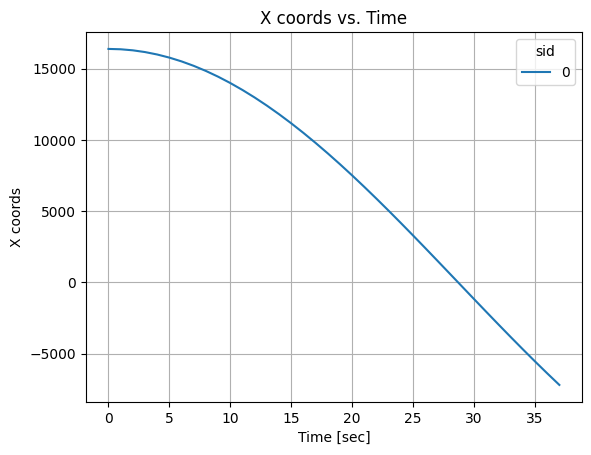

In [73]:
fig1, ax1 = plt.subplots()

citros.time_plot(ax1, 
                 topic_name = '/poliastro_simple_orbit/state', 
                 var_name = 'data.data[0]', 
                 time_step = 1, 
                 sids = [0], 
                 y_label = 'X coords', title_text = 'X coords vs. Time')

To create a 3D plot of our orbit, we can use Matplotlib standart functions:

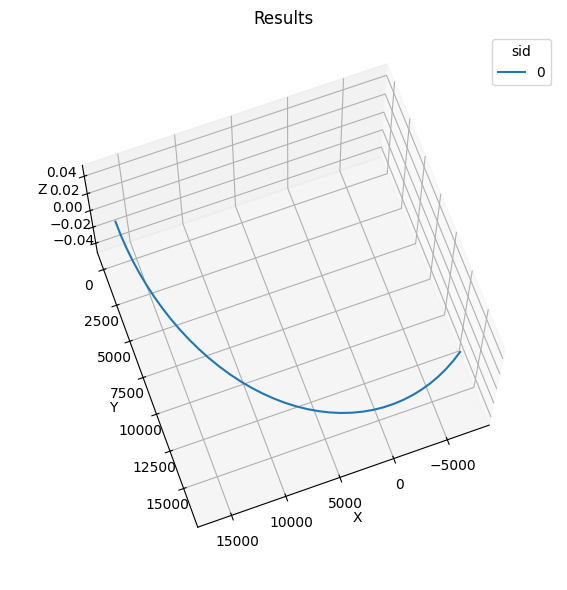

In [74]:
df = citros.topic('/poliastro_simple_orbit/state').sid([0]).data(['data.data[0]', 'data.data[1]', 'data.data[2]'])



fig, ax = citros.plot_3dgraph(df, 'data.data[0]', 'data.data[1]', 'data.data[2]', 

                 scale = False, title = 'Results', set_x_label='X', set_y_label='Y', set_z_label='Z',

                 legend = True, )



ax.set_box_aspect(aspect=None, zoom=0.9)

ax.view_init(70, 70, 0)



fig.tight_layout() 

As you can see here, we've got only a part of orbit because of given time bounds.

Let's do some simple research. We can use more interesting part of this project - Poliastro atmospheric drag simulation. To perform this, it's necessary to use another batch ID:

In [75]:
citros = CitrosDB(simulation='simulation_poliastro_atmo_drag', batch='poliastro_atmo_drag')

citros.info().print()

{
 'size': '385 kB',
 'sid_count': 10,
 'sid_list': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'topic_count': 3,
 'topic_list': ['/config', '/poliastro_atmo_drag/res', '/poliastro_atmo_drag/state'],
 'message_count': 1575
}


You can see here more than one sids - the simulation batch settings have been adjusted in such a way that each simulation corresponds to a coefficient value from the range [2..3].
We will use this CITROS advantage to analyze the effect of drag coefficient to the orbiting duration:

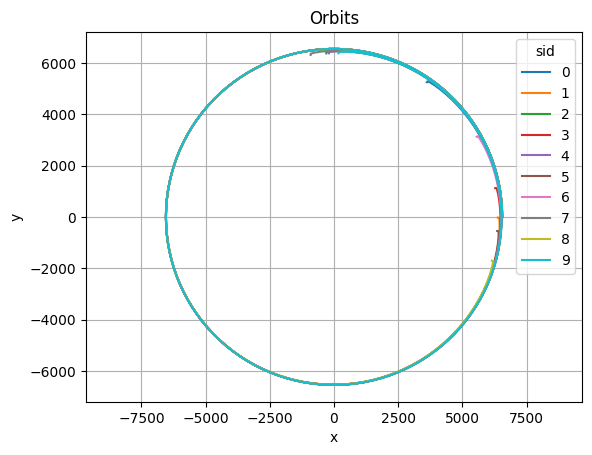

In [76]:
#create a figure to plot on
fig2, ax2 = plt.subplots()

citros.xy_plot(ax2, 
               topic_name = '/poliastro_atmo_drag/state', 
               var_x_name = 'data.data[0]',
               var_y_name = 'data.data[1]',
               sids = [0,1,2,3,4,5,6,7,8,9], 
               x_label = 'x', y_label = 'y', title_text = 'Orbits')
ax2.set_aspect(1,'datalim')

This plot shows us that the orbits have different duration depending on drag coefficient. You can see the small parts of plots where satellite losses it's altitude and velocity and dives down inside the atmosphere.

Let's investigate how powerfull the drag influence is:

In [77]:
cd_list= citros.topic('/config').data('data.poliastro_atmo_drag.ros__parameters.c_d')['data.poliastro_atmo_drag.ros__parameters.c_d'].tolist()


The orbit duration decreases while the drag coefficient rises from  2.3947510076449086 to  3.8009665395941967


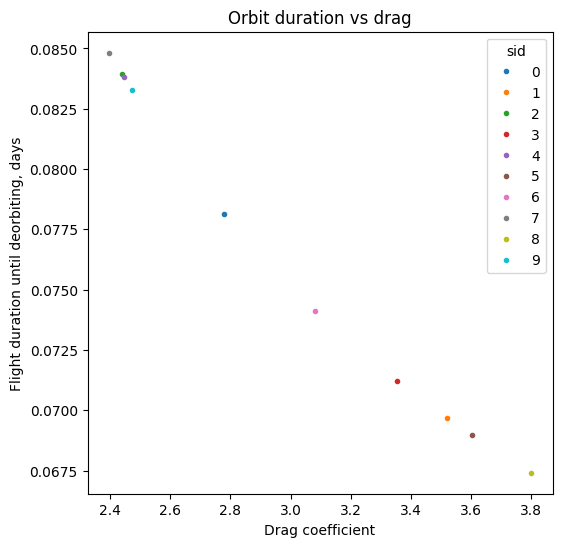

In [78]:
# Defining the list of drag coefficients

c_d_list = citros.topic('/config').data('data.poliastro_atmo_drag.ros__parameters.c_d')['data.poliastro_atmo_drag.ros__parameters.c_d'].tolist()
c_d_list = [i for i in cd_list if math.isnan(i) == False] # deleting nans



# Setting Dataframe

df = citros.topic('/poliastro_atmo_drag/res').set_order({'sid':'asc'}).data('data.data[0]')

df['drag'] = c_d_list



fig3, ax3 = citros.plot_graph(df, 'drag', 'data.data[0]', '.', title = 'Orbit duration vs drag', set_x_label='Drag coefficient', set_y_label = 'Flight duration until deorbiting, days')

ax3.grid()

print('The orbit duration decreases while the drag coefficient rises from ', min(c_d_list) ,'to ', max(c_d_list))